In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv(r"C:\Users\KIIT\Downloads\Social_Network_Ads.csv")

In [10]:
df.sample(5)

,Age,EstimatedSalary,Purchased
302,37,137000,1
389,48,35000,1
63,32,120000,1
250,44,39000,0
110,39,71000,0


__Train test split__

In [55]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.drop('Purchased',axis=1),df['Purchased'],test_size=0.3,random_state=0)

In [57]:
x_train.shape,y_train.shape

((280, 2), (280,))

__StandardScaler__

In [60]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

#fit the scaler to the train set,it will learn the parameters
scaler.fit(x_train)

#transform train and test sets
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)




In [62]:
scaler.scale_

array([1.01999375e+01, 3.45792870e+04])

In [84]:
x_train_scaled=pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled=pd.DataFrame(x_train_scaled,columns=x_train.columns)

In [86]:
x_train_scaled

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


In [91]:
np.round(x_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


Text(0.5, 1.0, 'Before Scaling')

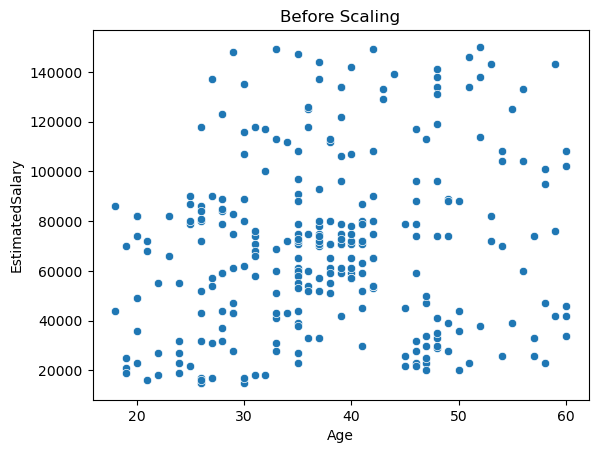

In [139]:
sns.scatterplot(x=x_train['Age'],y=x_train['EstimatedSalary'])
plt.title("Before Scaling")


<Axes: title={'center': 'After Scaling'}, xlabel='Age', ylabel='EstimatedSalary'>

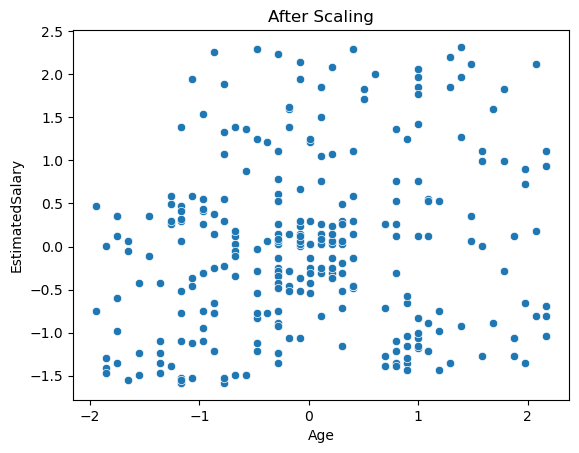

In [111]:
plt.title("After Scaling")
sns.scatterplot(x=x_train_scaled['Age'],y=x_train_scaled['EstimatedSalary'])
# The distribution of the graph remain same as the original one but the scale changes.The below graph become min centered

Text(0.5, 1.0, 'Before Scaling')

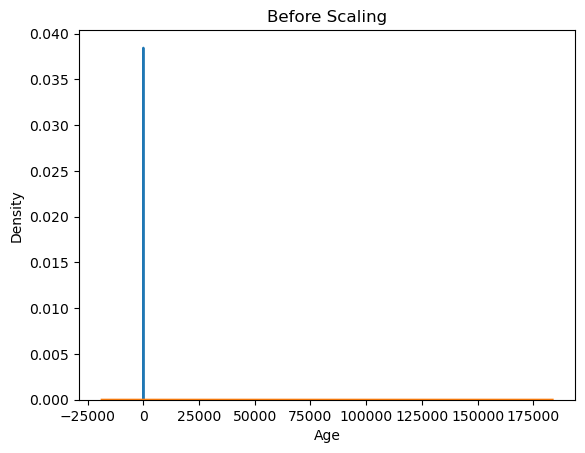

In [133]:
sns.kdeplot(x_train['Age'])
sns.kdeplot(x_train['EstimatedSalary'])
plt.title("Before Scaling")
#below shows the pdf of age(in small range) and salary (larger range)
#there is no comparision since there scale are very different


Text(0.5, 1.0, 'After Scaling')

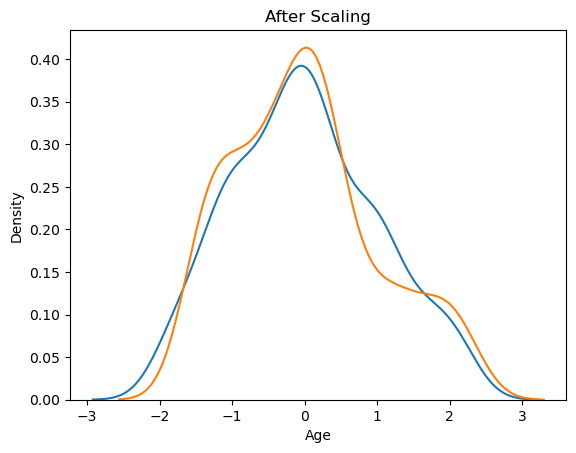

In [137]:
sns.kdeplot(x_train_scaled['Age'])
sns.kdeplot(x_train_scaled['EstimatedSalary'])
plt.title("After Scaling")
# after scaling both feature are comparable.so any operation can be applied